In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from tqdm import trange
plt.style.use(['science','grid'])
from ast import literal_eval
import json
import matplotlib as mpl


# import custom modules
import Pub
import PubCrawlFunctions as PCF
import Ant
import Logger

# import randomPubsInit

In [8]:
# velocity of an ant
velAnt = int(5000 / 60)         # 5km/h in m/min

# load the pubs
Pubs = PCF.initPubs('pubs.csv')

# set all pub popularities to 1
for pub in Pubs:
    pub.popularity *= 30

In [9]:


# Ants = loadAnt('Logs/BestPath_133.json')
Ants = Logger.loadLog('Logs/BestPath.json', velAnt)
bestAnt = Ants[-1]


In [10]:
# sum all popularities
sumPopularity = 0
for p in Pubs:
    sumPopularity += p.popularity

print('Sum of all popularities: ', sumPopularity)

Sum of all popularities:  40350


[[ 17.           0.        ]
 [  4.          65.02684167]
 [  2.         105.89067238]
 [  1.         112.32201534]
 [  5.         224.58023084]
 [ 18.         290.46441117]
 [ 15.         325.93606476]
 [  7.         416.35828577]
 [  6.         421.51013584]
 [  0.         427.26021984]
 [  3.         455.13657038]
 [ 14.         466.96941298]
 [ 13.         524.53210406]
 [ 12.         574.21573205]
 [  9.         581.74703784]
 [ 16.         588.71322504]
 [  8.         594.30439297]
 [ 11.         626.72438951]
 [ 10.         633.17180226]]


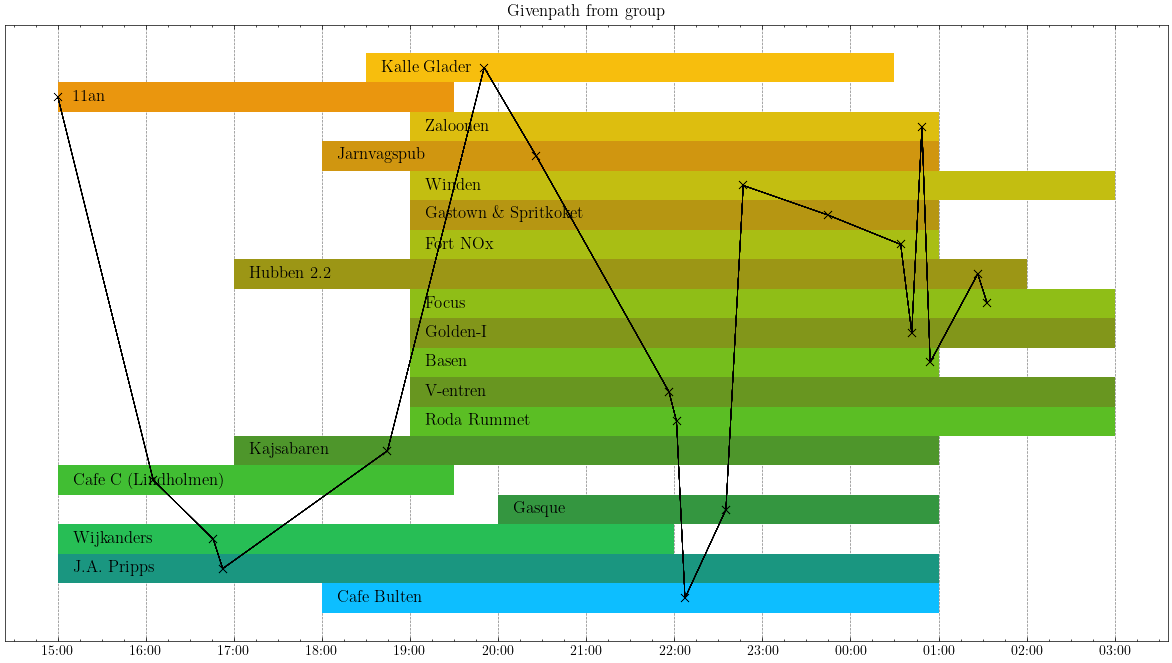

In [11]:
# create a plot where the opening hours and closing hours of the pubs are shown
# in vertical direction plot all the pubs
# in horizontal direction plot the time

# time is in minutes, the opening times are shown as recatangles

fig, ax = plt.subplots(figsize=(15, 8))

bestPath = np.array(bestAnt.timedPath)


x = bestPath[:,1]
y = bestPath[:,0] + .5
# convert to integer
# x = x.astype(int)
# y = y.astype(int)

print(bestPath)


i = 0

for p in Pubs:
    i += 1
    r = 13
    b = 255
    g = 40 * (i % 2) + 150

    # use different color for each pub
    # plot the opening times
    ax.broken_barh([(p.openingTime, p.closingTime - p.openingTime)], (p.pubID, 1), facecolors=[i*r/255,g/255,b/i/255])
    ax.plot(x, y, marker='x', markeredgecolor='black', markeredgewidth=0.1, linestyle='-', color='black', linewidth=0.5)
    # place a text with the pubName

    # label the bars on the y-axis with their name which comes as a string pubName
    # make it bolt and italic

    ax.text(p.openingTime +10, p.pubID + .5, p.pubName, fontsize=12, fontstyle='oblique', verticalalignment='center', horizontalalignment='left', color='black')
    #ax.text(p.openingTime + 15, p.pubID + .5, p.pubName, verticalalignment='center', horizontalalignment='left', color='black', usetex = True)

    # ax.text(p.openingTime + 15, p.pubID + .5, p.pubName, style='italic', fontsize=8,
    #     bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

    



# change xticks such that 0 equals 15:00, 60 equals 16:00 etc. do it until 780 equal 03:00
plt.xticks(np.arange(0, 780, 60), ('15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00','22:00','23:00','00:00','01:00','02:00','03:00'))


plt.yticks([])
plt.title('Givenpath from group')
plt.grid('on')

# save the figure
plt.savefig('GivenPath_BestPath.svg', format='svg')
plt.show()


[[ 17.           0.        ]
 [  4.          65.02684167]
 [  2.         105.89067238]
 [  1.         112.32201534]
 [  5.         224.58023084]
 [ 18.         290.46441117]
 [ 15.         325.93606476]
 [  7.         416.35828577]
 [  6.         421.51013584]
 [  0.         427.26021984]
 [  3.         455.13657038]
 [ 14.         466.96941298]
 [ 13.         524.53210406]
 [ 12.         574.21573205]
 [  9.         581.74703784]
 [ 16.         588.71322504]
 [  8.         594.30439297]
 [ 11.         626.72438951]
 [ 10.         633.17180226]]


(0.0, 720.0)

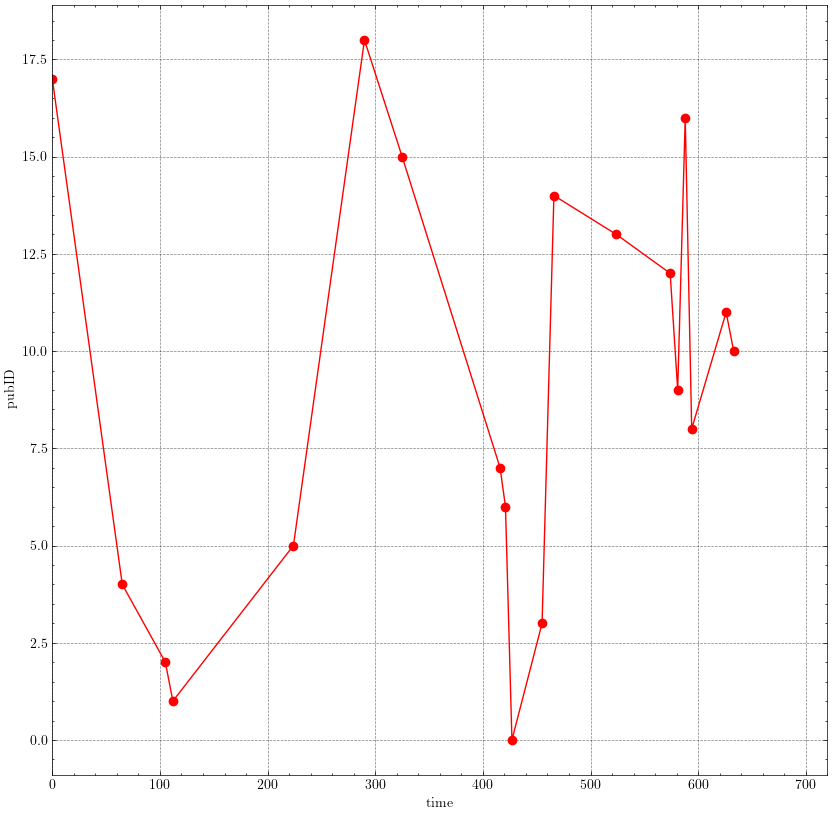

In [12]:
# scatter plot to show the trajectory of the best ant over time, x-> time y-> pubID
fig, ax = plt.subplots(figsize=(10, 10))

bestPath = np.array(bestAnt.timedPath)

x = bestPath[:,1]
y = bestPath[:,0]
# convert to integer
x = x.astype(int)
y = y.astype(int)

print(bestPath)


ax.plot(x, y, c='r', marker="o")
ax.set_xlabel('time')
ax.set_ylabel('pubID')
ax.set_xlim(0, 720)